# EDA

- fuente : Airbnd New York

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Paso 1: Cargar el Dataset

In [2]:
df = pd.read_csv('../data/raw/AB_NYC_2019.csv')

df.head

<bound method NDFrame.head of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

         

#### Conclusion
Como podemos observar el dataset contiene 48895 y 16 columnas, de estas solamente las columnas last_review y reviews_per_month contienen una mayor parte de datos nulos, lo cual sera un problema a tener que tratar mas adelante. Tambien podemos observar valores atipicos en la tabla como puede ser ´price´ y ´minimun_nights´.Ç


## Paso 2: Exploracion basica

Analisis basico del dataset, su tamaño, tipos de datos, estadisticas basicas...

In [3]:
size = {"Filas": df.shape[0], "Columnas": df.shape[1]}
size

{'Filas': 48895, 'Columnas': 16}

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Conclusion
Como podemos observar el dataset contiene 48895 y 16 columnas, de estas solamente las columnas last_review y reviews_per_month contienen una mayor parte de datos nulos, lo cual sera un problema a tener que tratar mas adelante. Tambien podemos observar valores atipicos en la tabla como puede ser ´price´ y ´minimun_nights´.Ç


## Paso 3: Limpieza del Dataset

Copiamos los datos a un nuevo dataframe y empezaremos a limpiar, lo primero que haremos sera cambiar quitar los outliers y luego eliminaremos columnas que pueden ser irrelevantes

In [7]:
df_clean = df.copy()

In [8]:
df_clean = df_clean[(df_clean['price'] > 10) & (df_clean['price'] < 899)]
df_clean = df_clean[df_clean['minimum_nights'] <= 30]

df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.777000e+04,4.777000e+04,47770.000000,47770.000000,47770.000000,47770.000000,47770.000000,38200.000000,47770.000000,47770.000000
mean,1.903355e+07,6.777138e+07,40.728807,-73.951823,138.982541,5.579066,23.582144,1.385112,7.177936,111.216977
std,1.096633e+07,7.864424e+07,0.054629,0.046288,108.222598,8.197692,44.840383,1.687392,33.175794,130.948012
min,2.539000e+03,2.571000e+03,40.499790,-74.244420,11.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.486255e+06,7.899469e+06,40.689910,-73.982800,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.969891e+07,3.102542e+07,40.722805,-73.955450,105.000000,2.000000,5.000000,0.730000,1.000000,43.000000
75%,2.913542e+07,1.074344e+08,40.763070,-73.935780,175.000000,5.000000,24.000000,2.040000,2.000000,222.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,898.000000,30.000000,629.000000,58.500000,327.000000,365.000000


Borramos columnas identificadoras que no aportan valor al analisis

In [9]:
df_clean = df_clean.drop(columns=['id', 'host_id', 'host_name', 'name'])

df_clean


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## Paso 4 : Analisis descriptivo del dataset



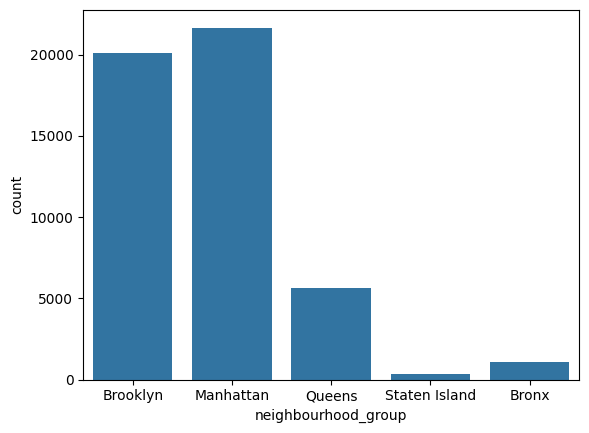

In [10]:
sns.countplot(data=df, x='neighbourhood_group')
plt.show()

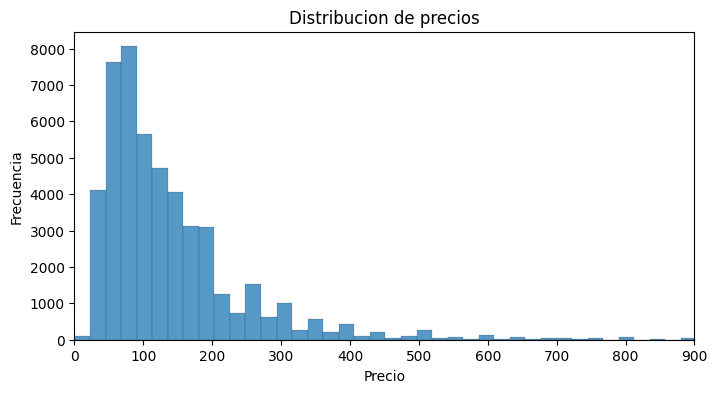

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(df['price'])
plt.title('Distribucion de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.xlim(0, 900)
plt.show()


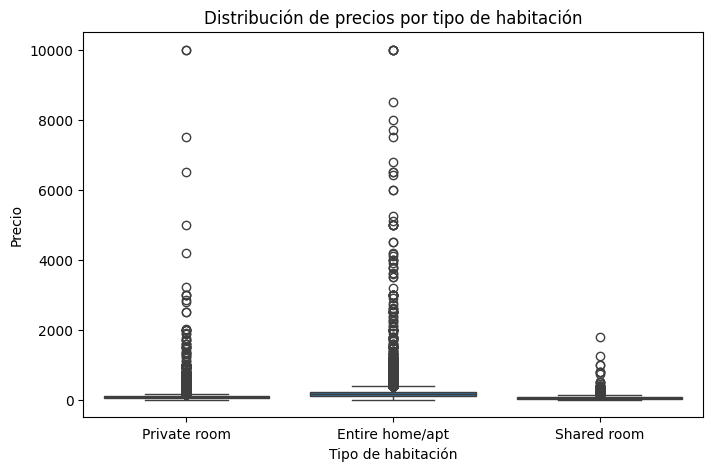

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='room_type', y='price')
plt.title('Distribución de precios por tipo de habitación')
plt.xlabel('Tipo de habitación')
plt.ylabel('Precio')
plt.show()


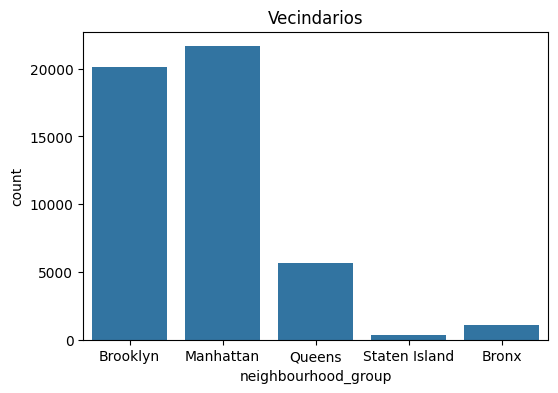

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='neighbourhood_group', data=df)
plt.title('Vecindarios')
plt.show()

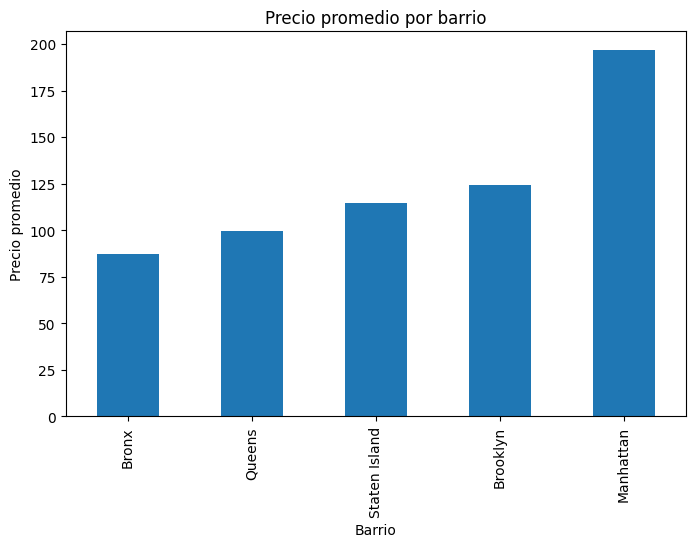

In [14]:
plt.figure(figsize=(8, 5))
df.groupby('neighbourhood_group')['price'].mean().sort_values().plot(kind='bar')
plt.title('Precio promedio por barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio promedio')
plt.show()

Observaciones principales:
Los precios varian segun el barrio, de mas baarato a mas caro tenemos Bronx < Queens < Staten Island < Brooklyn < Manhattan. Siendo Manhattan y Brooklyn las zonas con mas alojamientos

El tipo de habitacion tiene relacion con el precio. Las shared room tienden a ser mucho mas baratas ques private rooms o entire home

En cuanto a los precios la mayoria se concentra entre los 50 y los 300 dolares, a partir aproximadamente de los 330 la frecuencia cae drasticamentes, quias seria razonable filtrar esos valores a la hora de entrenar el modelo

## Separar las variables

In [16]:
X = df.drop(columns=['price'])  # Variables predictoras
y = df['price']                 # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)